The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


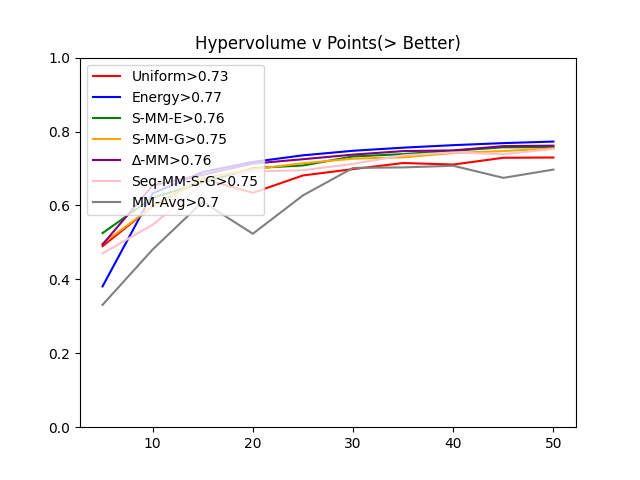

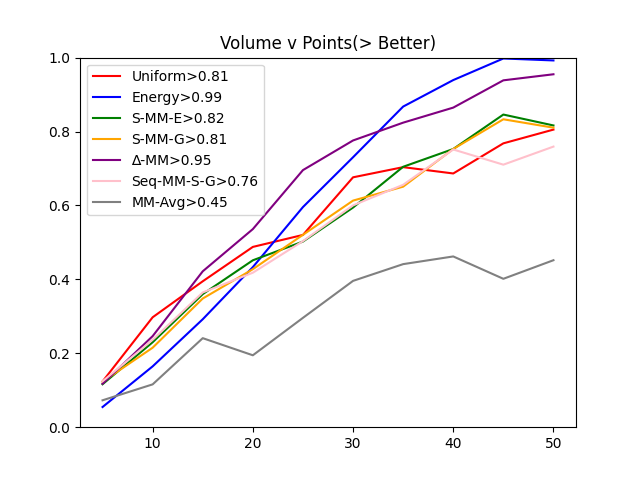

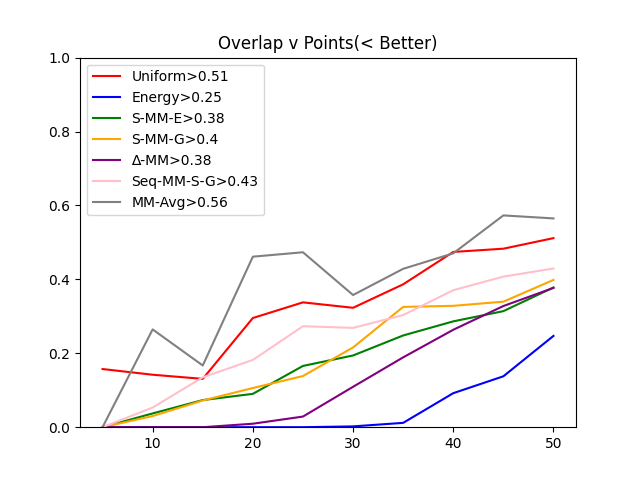

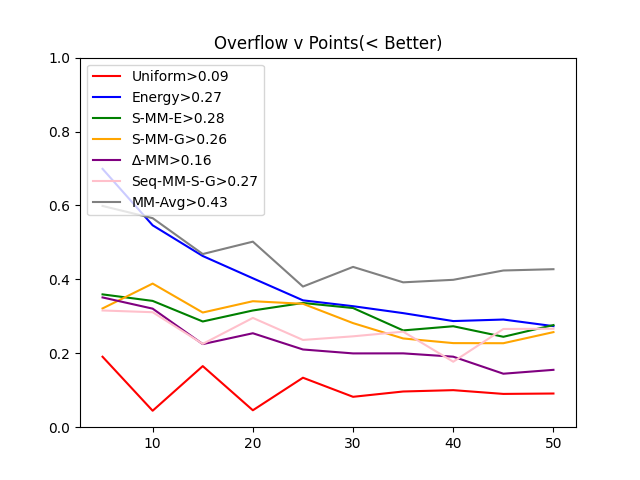

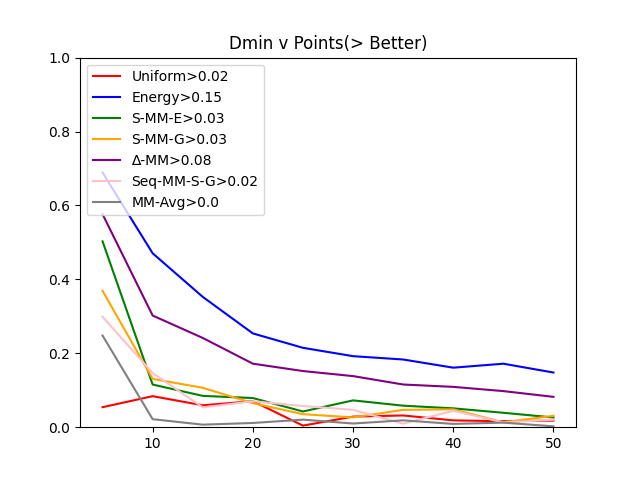

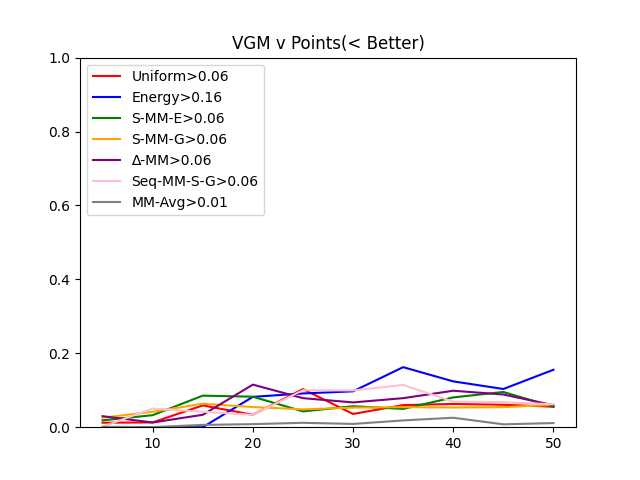

In [215]:
import numpy as np
import methods as m
%matplotlib widget
%load_ext autoreload
%autoreload 2

axHV = m.getmap2D()
axVol = m.getmap2D()
axOver = m.getmap2D()
axFlow = m.getmap2D()
axDmin = m.getmap2D()
axVGM = m.getmap2D()

hvOBJ = m.hvobj(3)
perf = m.performance_metrics.get_indicator("rad-simplex", radius=0.1)
perfDmin = m.performance_metrics.get_indicator("dmin")
perfVGM = m.performance_metrics.get_indicator("vgm")

names = ['Uniform', 'Energy', 'S-MM-E', 'S-MM-G', '∆-MM', 'Seq-MM-S-G', 'MM-Avg']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'gray', 'black']
hv = []
points = []
SphereVolume = []
SphereOverlap = []
SphereOverflow = []
Dmin = []
VGM = []

X = []
maxx = 51

for _ in range(len(names)):
    hv.append([0.0] * (maxx//5))
    SphereVolume.append([0.0] * (maxx//5))
    SphereOverlap.append([0.0] * (maxx//5))
    SphereOverflow.append([0.0] * (maxx//5))
    Dmin.append([0.0] * (maxx//5))
    VGM.append([0.0] * (maxx//5))
    points.append([[]] * (maxx // 5))

for num in range(5, maxx, 5):
    X.append(num)
    points[0][num // 5 - 1] = m.dich(num)
    points[1][num // 5 - 1] = m.getRD(3, num)
    points[2][num // 5 - 1] = m.maximinSphere(num, 100, m.eluc_dis, m.randomSpherePoint)
    points[3][num // 5 - 1] = m.maximinSphere(num, 100, m.circle_dis, m.randomSpherePoint)
    points[4][num // 5 - 1] = m.maximin(num, 1000, m.eluc_dis, m.random2SimplexPoint)
    points[5][num // 5 - 1] = m.SeqmaximinSphere(num, 100, m.circle_dis, m.randomSpherePoint, past=m.maximin(num, 50, m.circle_dis, m.randomSpherePoint))
    points[6][num // 5 - 1] = m.maximinAvgSphere(num, 100, m.circle_dis, m.randomSpherePoint)
    
    for i in range(len(names)):
        hv[i][num // 5 - 1] = m.calchv(hvOBJ, np.array(points[i][num // 5 - 1]))
        metrics = perf.do(np.array(points[i][num // 5 - 1]))
        SphereVolume[i][num // 5 - 1] = metrics[0]
        SphereOverlap[i][num // 5 - 1] = metrics[1]
        SphereOverflow[i][num // 5 - 1] = metrics[2]
        Dmin[i][num // 5 - 1] = perfDmin.do(np.array(points[i][num // 5 - 1]))
        VGM[i][num // 5 - 1] = perfVGM.do(np.array(points[i][num // 5 - 1])) * 100
        
    
for i in range(len(names)):
    axHV.plot(X,hv[i], colors[i], label=names[i]+'>'+str(round(hv[i][-1], 2)))
    axVol.plot(X,SphereVolume[i], colors[i], label=names[i]+'>'+str(round(SphereVolume[i][-1], 2)))
    axOver.plot(X,SphereOverlap[i], colors[i], label=names[i]+'>'+str(round(SphereOverlap[i][-1], 2)))
    axFlow.plot(X,SphereOverflow[i], colors[i], label=names[i]+'>'+str(round(SphereOverflow[i][-1], 2)))
    axDmin.plot(X,Dmin[i], colors[i], label=names[i]+'>'+str(round(Dmin[i][-1], 2)))
    axVGM.plot(X,VGM[i], colors[i], label=names[i]+'>'+str(round(VGM[i][-1], 2)))
    
    
axHV.title.set_text("Hypervolume v Points(> Better)")
axVol.title.set_text("Volume v Points(> Better)")
axOver.title.set_text("Overlap v Points(< Better)")
axFlow.title.set_text("Overflow v Points(< Better)")
axDmin.title.set_text("Dmin v Points(> Better)")
axVGM.title.set_text("VGM v Points(< Better)")

axHV.legend(loc="upper left")
axVol.legend(loc="upper left")
axOver.legend(loc="upper left")
axFlow.legend(loc="upper left")
axDmin.legend(loc="upper left")
axVGM.legend(loc="upper left")



# a7 = m.getmap3D()

# a8 = m.getmap2D()
# N = 16

# p7 = np.array(np.arange(2 * N).reshape(N,2),dtype=float)

# low = int(N ** (1/2))

# for i in range(low):
#     for j in range(low):
#         p7[i * low + j][0] = (i / (low-1))
#         p7[i * low + j][1] = (j / (low-1))
# a8.plot(p7[:,0], p7[:,1],'ok')
# p7  = m.map_hypercuble_to_simplex(p7)
# a7.plot(p7[:,0], p7[:,1], p7[:,2],'ok')
# print(p7)


